# PCA
Using Python and Numpy, write a class named PCA with necessary methods, which implements a standard PCA method.

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import cv2 as cv
class PCA:
    def __init__(self, k):
        self.k = k
    def cov(self,X):
        self.mean=np.mean(X,axis=1).reshape(-1,1)
        self.X=X-self.mean
        n=X.shape[0]
        C=1/n*np.dot(self.X.T,self.X)
        return C
    def fit(self, X):
        C=self.cov(X)
        eigenvalues, eigenvectors = np.linalg.eig(C)
        idx = np.argsort(-eigenvalues)
        eigenvectors=eigenvectors[:,idx]
        self.eigenvectors=eigenvectors[:,:self.k]
        X_transformed = np.dot(self.X,self.eigenvectors)
        return X_transformed
    def reconstruct(self,X_transformed):
        X_reconstruct=np.dot(X_transformed,self.eigenvectors.T)+self.mean
        return X_reconstruct  
    def paint_image(self,origin_image,reconImage):
        _, axes = plt.subplots(1, 2, figsize=(10, 5))
        # 显示图像1
        axes[0].imshow(origin_image,cmap='gray')
        axes[0].axis('off')
        axes[0].set_title('Original Image')

        # 显示图像2
        axes[1].imshow(reconImage,cmap='gray')
        axes[1].axis('off')
        axes[1].set_title('Reconstructive Image (k={})'.format(self.k))

        plt.show()

def reshape_image_array(image_array):
    n, m, _ = image_array.shape
    reshaped_array = np.zeros((3 * n, m), dtype=image_array.dtype)

    reshaped_array[:n, :] = image_array[:, :, 0]  # R channel
    reshaped_array[n:2 * n, :] = image_array[:, :, 1]  # G channel
    reshaped_array[2 * n:, :] = image_array[:, :, 2]  # B channel

    return reshaped_array

def restore_image_array(reshaped_array, original_shape):
    n, m, _ = original_shape
    restored_array = np.zeros(original_shape, dtype=reshaped_array.dtype)

    restored_array[:, :, 0] = reshaped_array[:n, :]  # R channel
    restored_array[:, :, 1] = reshaped_array[n:2 * n, :]  # G channel
    restored_array[:, :, 2] = reshaped_array[2 * n:, :]  # B channel

    return restored_array


(409600, 3)


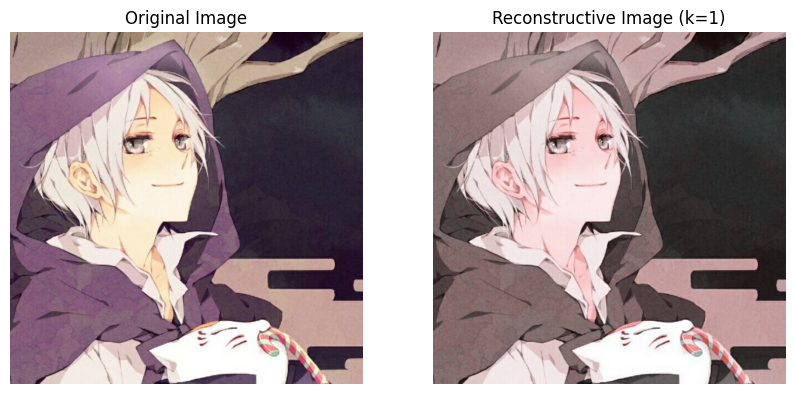

In [8]:
imagePath = 'p1.jpg'
origin_image = cv.imread(imagePath)
origin_image = cv.cvtColor(origin_image, cv.COLOR_BGR2RGB)
reshaped_array = origin_image.reshape(-1, origin_image.shape[2])
print(reshaped_array.shape)
pca=PCA(1)
reconImage=pca.reconstruct(pca.fit(reshaped_array))
reconImage=reconImage.reshape(origin_image.shape)
reconImage = reconImage.astype(np.uint8)
pca.paint_image(origin_image,reconImage)

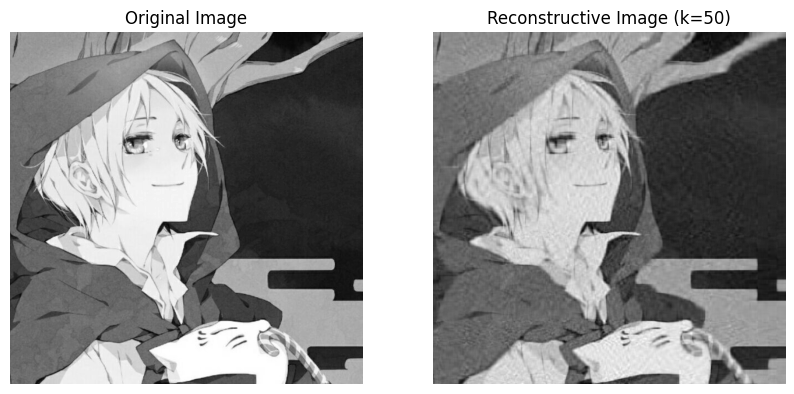

In [ ]:
def image_to_dataset(image_path):
    img = Image.open(image_path)
    img=img.convert('L')
    img_array = np.array(img)
    return img_array
image_path = "p1.jpg"
origin_image = image_to_dataset(image_path)
pca=PCA(50)
reconImage=pca.reconstruct(pca.fit(origin_image))
pca.paint_image(origin_image,reconImage)